In [41]:
# Imports necessary libraries for API calls, data handling, time, and machine learning
import requests
import pandas as pd
import numpy as np
import pytz
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error

API_KEY = "dca885a7f61210902aaea785372a6d41"
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"

In [42]:

# ==============================================================================
# SECTION 2: API and Data Loading Functions
# ==============================================================================

def get_current_weather(city):
    """Fetches current weather data for a specific city using the OpenWeatherMap API."""
    url = BASE_URL.format(city=city, API_KEY=API_KEY)
    
    # Send GET request and check for errors
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.HTTPError as e:
        print(f"Error fetching weather data: {e}")
        return None
    
    # Return relevant weather information
    return {
        "city_name": data.get("name"),
        "current_temp": round(data["main"]["temp"]),
        "feels_like": round(data["main"]["feels_like"]),
        "temp_min": round(data["main"]["temp_min"]),
        "temp_max": round(data["main"]["temp_max"]),
        "humidity": round(data["main"]["humidity"]),
        "description": data["weather"][0]["description"],
        "country": data["sys"]["country"],
        "pressure": data["main"]["pressure"],
        # Wind degree is used for direction mapping
        "wind_gust_deg": data["wind"]["deg"],
        # Wind speed is used as a feature
        "wind_gust_speed": data["wind"]["speed"]
    }



display(get_current_weather("Phnom Penh"))
display(get_current_weather("New York"))

# def read_historical_data(file_name):
#     """Reads, cleans, and returns the historical weather data from a CSV file."""
#     try:
#         df = pd.read_csv(file_name)
#     except FileNotFoundError:
#         print(f"Error: The file '{file_name}' was not found. Please upload your historical data CSV.")
#         return pd.DataFrame()

#     # Clean the data frame by removing missing and duplicate values
#     df.dropna(inplace=True)
#     df.drop_duplicates(inplace=True)
    
#     return df
# display(read_historical_data("PP_Weather.csv"))

{'city_name': 'Phnom Penh',
 'current_temp': 24,
 'feels_like': 25,
 'temp_min': 24,
 'temp_max': 24,
 'humidity': 73,
 'description': 'overcast clouds',
 'country': 'KH',
 'pressure': 1015,
 'wind_gust_deg': 6,
 'wind_gust_speed': 8.72}

{'city_name': 'New York',
 'current_temp': 5,
 'feels_like': 3,
 'temp_min': 3,
 'temp_max': 7,
 'humidity': 68,
 'description': 'clear sky',
 'country': 'US',
 'pressure': 1021,
 'wind_gust_deg': 210,
 'wind_gust_speed': 2.57}

INFO: Attempting to fetch data for Paris from API...


/var/folders/h_/n_hvysld07s80ry_ldjph_pm0000gn/T/ipykernel_85327/3953780189.py:182: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


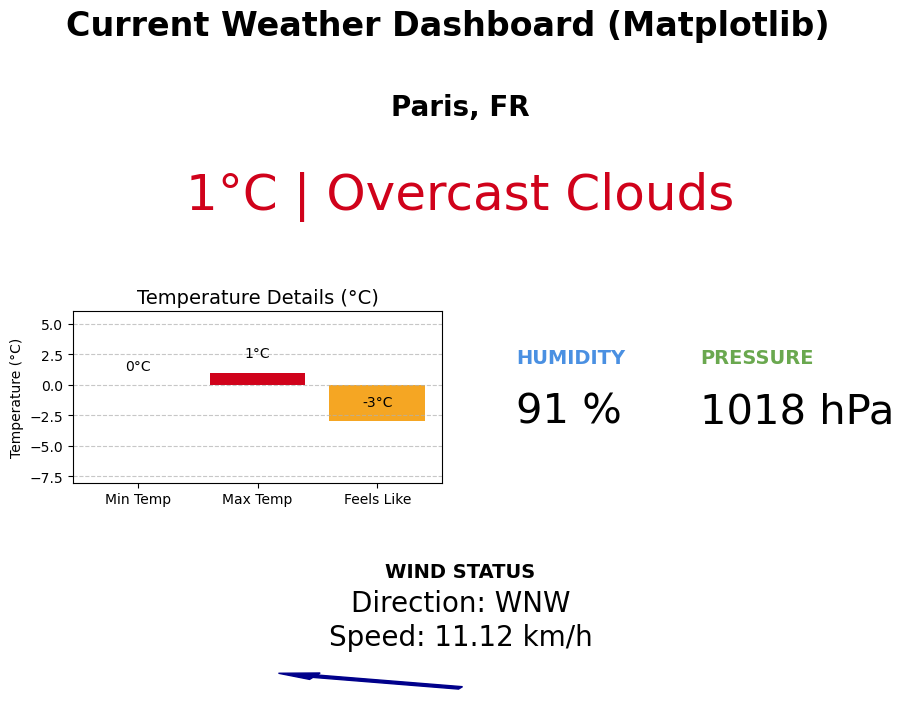

INFO: Attempting to fetch data for Phnom Penh from API...


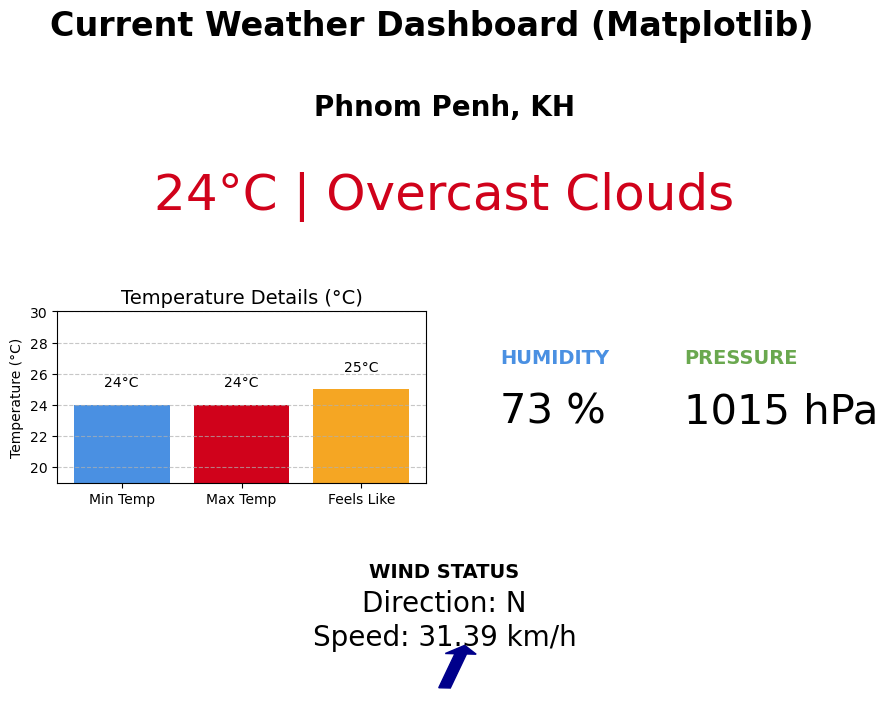

In [43]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import requests 
from requests.exceptions import HTTPError, RequestException # Import specific exception types
API_KEY = "dca885a7f61210902aaea785372a6d41" 
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"


class WeatherDashboard:
    """
    A class to fetch, process, and visualize current weather data for a city 
    using a dashboard layout created with Matplotlib.
    """
    
    def __init__(self):
        """Initializes the dashboard, data will be loaded upon running run_dashboard."""
        self.data = None

    # --- Utility Methods (Data Transformation and Fetching) ---

    def _map_internal_data(self, data_dict):
        """
        Ensures the data is in the final internal plotting format, applies rounding,
        and converts wind speed from m/s to km/h if it hasn't been done already.
        """
        try:
            speed = data_dict['wind_gust_speed']
            # Heuristic check: if the speed is low, it's likely m/s and needs conversion
            if speed < 10: 
                 data_dict['wind_gust_speed'] = round(speed * 3.6, 2)
            
            # Apply rounding as per user's original function output
            data_dict['current_temp'] = round(data_dict['current_temp'])
            data_dict['feels_like'] = round(data_dict['feels_like'])
            data_dict['temp_min'] = round(data_dict['temp_min'])
            data_dict['temp_max'] = round(data_dict['temp_max'])
            data_dict['humidity'] = round(data_dict['humidity'])
            data_dict['pressure'] = int(data_dict['pressure'])
            
            return data_dict

        except (KeyError, TypeError, IndexError) as e:
            print(f"ERROR: Failed to map pre-fetched data due to missing keys or invalid structure: {e}")
            return None


    def _get_city_weather_data(self, city):
        """
        Fetches current weather data for a specific city using the OpenWeatherMap API,
        using the correct requests method and matching the user's data processing.
        """
        print(f"INFO: Attempting to fetch data for {city} from API...")
        
        # Validation checks
        if API_KEY == "YOUR_ACTUAL_API_KEY_HERE":
             print("CRITICAL ERROR: API_KEY is not set. Please fill in the placeholder at the top of the file.")
             return None
        if '?' in BASE_URL:
             print("CRITICAL ERROR: BASE_URL is incorrectly formatted. It must be clean (e.g., '.../weather').")
             return None
        
        try:
            # 1. Prepare API request parameters (Correct use of requests.get)
            params = {
                'q': city,
                'appid': API_KEY,
                'units': 'metric' # Fetch temperatures in Celsius
            }
            
            # 2. Execute API request
            response = requests.get(BASE_URL, params=params)
            response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
            data = response.json()
        
            # 3. Extract data, matching the structure of the user's working function
            raw_output = {
                "city_name": data.get("name"),
                "current_temp": data["main"]["temp"],
                "feels_like": data["main"]["feels_like"],
                "temp_min": data["main"]["temp_min"],
                "temp_max": data["main"]["temp_max"],
                "humidity": data["main"]["humidity"],
                "description": data["weather"][0]["description"],
                "country": data["sys"]["country"],
                "pressure": data["main"]["pressure"],
                "wind_gust_deg": data["wind"].get("deg", 0),
                "wind_gust_speed": data["wind"]["speed"] # Speed is in m/s (needs conversion)
            }
            
            # 4. Final mapping and conversion (m/s to km/h, rounding)
            return self._map_internal_data(raw_output)

        except HTTPError as e:
            if e.response.status_code == 404:
                print(f"ERROR: City '{city}' not found (HTTP 404).")
            elif e.response.status_code == 401:
                print("ERROR 401: Unauthorized. Please check that your API key is correct and active.")
            else:
                print(f"ERROR: HTTP request failed: {e}")
            return None
        except RequestException as e:
            print(f"ERROR: Network or connection error: {e}")
            return None
        except Exception as e:
             print(f"An unexpected error occurred during data processing: {e}")
             return None

    def _degrees_to_cardinal(self, d):
        """Converts degree value (0-360) to 16-point cardinal direction."""
        dirs = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
        ix = round(d / (360. / len(dirs)))
        return dirs[ix % len(dirs)]

    # --- Visualization Methods (Subplots) ---

    def _plot_current_status(self, ax):
        ax.axis('off')
        city_country = f"{self.data['city_name']}, {self.data['country']}"
        current_status = f"{self.data['current_temp']}°C | {self.data['description'].title()}"
        ax.text(0.5, 0.85, city_country, fontsize=20, fontweight='bold', ha='center', transform=ax.transAxes)
        ax.text(0.5, 0.3, current_status, fontsize=36, color='#D0021B', ha='center', transform=ax.transAxes)

    def _plot_temperature_bars(self, ax):
        temps = [self.data['temp_min'], self.data['temp_max'], self.data['feels_like']]
        labels = ['Min Temp', 'Max Temp', 'Feels Like']
        colors = ['#4A90E2', '#D0021B', '#F5A623']
        bars = ax.bar(labels, temps, color=colors)
        ax.set_title('Temperature Details (°C)', fontsize=14)
        ax.set_ylabel('Temperature (°C)')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}°C', ha='center', va='bottom', fontsize=10)
        ax.set_ylim(min(temps)-5, max(temps)+5)

    def _plot_humidity_pressure(self, ax):
        ax.axis('off')
        ax.text(0.1, 0.7, 'HUMIDITY', fontsize=14, fontweight='bold', color='#4A90E2', transform=ax.transAxes)
        ax.text(0.1, 0.35, f"{self.data['humidity']} %", fontsize=30, ha='left', transform=ax.transAxes)
        ax.text(0.6, 0.7, 'PRESSURE', fontsize=14, fontweight='bold', color='#6AA84F', transform=ax.transAxes)
        ax.text(0.6, 0.35, f"{self.data['pressure']} hPa", fontsize=30, ha='left', transform=ax.transAxes)

    def _plot_wind_status(self, ax):
        ax.axis('off')
        wind_deg = self.data['wind_gust_deg']
        wind_dir = self._degrees_to_cardinal(wind_deg)
        
        ax.text(0.5, 0.75, 'WIND STATUS', fontsize=14, fontweight='bold', ha='center', transform=ax.transAxes)
        ax.text(0.5, 0.55, f"Direction: {wind_dir}", fontsize=20, ha='center', transform=ax.transAxes)
        ax.text(0.5, 0.35, f"Speed: {self.data['wind_gust_speed']} km/h", fontsize=20, ha='center', transform=ax.transAxes)
        
        angle_rad = np.deg2rad(90 - wind_deg)
        arrow_length = 0.2
        arrow_end_x = arrow_length * np.cos(angle_rad)
        arrow_end_y = arrow_length * np.sin(angle_rad)
        start_x, start_y = 0.5, 0.1 
        
        ax.arrow(start_x, start_y, arrow_end_x, arrow_end_y, 
                width=0.015, head_width=0.04, head_length=0.05, 
                color='darkblue', transform=ax.transAxes)

    # --- Main Execution Methods ---

    def render_dashboard(self):
        """Generates and displays the complete Matplotlib dashboard."""
        if not self.data:
            print("ERROR: Cannot render dashboard. Data is missing. Run run_dashboard() first.")
            return

        fig = plt.figure(figsize=(10, 8))
        fig.suptitle('Current Weather Dashboard (Matplotlib)', fontsize=24, fontweight='bold')
        
        gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.1)
        
        self._plot_current_status(fig.add_subplot(gs[0, :]))
        self._plot_temperature_bars(fig.add_subplot(gs[1, 0]))
        self._plot_humidity_pressure(fig.add_subplot(gs[1, 1]))
        self._plot_wind_status(fig.add_subplot(gs[2, :]))
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    def run_dashboard(self, data_source):
        """
        Fetches or accepts data, then renders the dashboard.
        
        :param data_source: Can be a string (city name) or a dictionary 
                            containing the pre-fetched processed data.
        """
        data_to_process = None

        if isinstance(data_source, str):
            # User provided a city name, fetch via API
            data_to_process = self._get_city_weather_data(data_source)
        elif isinstance(data_source, dict):
            # User provided pre-fetched data (must be in the internal format)
            print("INFO: Processing pre-fetched data...")
            data_to_process = self._map_internal_data(data_source)
        else:
            print("ERROR: Invalid input for run_dashboard. Must be a city name (str) or a data dictionary (dict).")
            return
            
        if data_to_process:
            self.data = data_to_process
            self.render_dashboard()
        else:
            print(f"Failed to load or display weather data. Check input data or city name.")
            
# --- Demonstration ---
# To test this code:
# 1. Fill in API_KEY and BASE_URL at the top.
# 2. Uncomment and run the lines below:
dashboard = WeatherDashboard()
dashboard.run_dashboard("Paris")
dashboard.run_dashboard("Phnom Penh")

In [44]:
def prepare_data(data):
    """Encodes categorical data, splits features (X) and target (y), and returns a LabelEncoder instance."""
    le = LabelEncoder()
    # Transform categorical columns to numerical values (e.g., 'N', 'S' -> 0, 1)
    data["WindGustDir"] = le.fit_transform(data["WindGustDir"])
    data["RainTomorrow"] = le.fit_transform(data["RainTomorrow"])

    # Define feature variables (X) and Target variable (Y)
    X = data.drop(columns=["RainTomorrow"]) 
    y = data["RainTomorrow"]

    return X, y, le

def train_rain_model(X, y):
    """Trains a Random Forest Classifier for rain prediction and calculates MSE."""
    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # ... (Code for prediction and MSE calculation)
    
    return model

In [45]:

# ==============================================================================
# SECTION 4: Regression (Temperature/Humidity Forecast) Functions
# ==============================================================================

def prepare_regression_data(data, feature):
    """Prepares time-series data for regression, using the current value to predict the next."""
    X = []
    y = []

    # Loop through the data to create (current_value, next_value) pairs
    for i in range(len(data) - 1):
        X.append(data[feature].iloc[i])
        y.append(data[feature].iloc[i + 1])

    # Convert lists to numpy arrays and reshape X for the regression model
    X = np.array(X).reshape(-1, 1)
    y = np.array(y)

    return X, y

def train_regression_model(X, y):
    """Trains a Random Forest Regressor model."""
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model

def predict_future(model, current_value):
    """Predicts the next 5 future values based on the trained model and a starting current value."""
    predictions = [current_value]

    # Loop 5 times to predict the next 5 time steps
    for _ in range(5):
        latest_value = predictions[-1]
        # Predict the next value (input must be a 2D array)
        predicted_value = model.predict(np.array([latest_value]).reshape(-1, 1))[0]
        predictions.append(predicted_value)

    # Return predictions excluding the initial current value
    return predictions[1:]



In [46]:


# ==============================================================================
# SECTION 5: Main Execution Function
# ==============================================================================

def weather_view():
    """Main function to run the weather analysis, prediction, and display results."""
    city = input("Enter city name: ")
    current_weather = get_current_weather(city)

    if current_weather is None:
        return

    # Load historical data (Ensure 'weather.csv' is uploaded)
    historical_data = read_historical_data("weather.csv")
    if historical_data.empty:
        print("Cannot proceed with model training without historical data.")
        return

    # --- Rain Prediction ---
    X, y, le = prepare_data(historical_data.copy()) # Use a copy to avoid modifying the original DataFrame
    rain_model = train_rain_model(X, y)

    # Map wind degree to categorical direction (as required by the trained model)
    wind_degree = current_weather["wind_gust_deg"] % 360
    
    compass_points = [
        (0.0, 11.25, "N"), (348.75, 360.0, "N"), (11.25, 33.75, "NNE"), 
        (33.75, 56.25, "NE"), (56.25, 78.75, "ENE"), (78.75, 101.25, "E"),
        (101.25, 123.75, "ESE"), (123.75, 146.25, "SE"), (146.25, 168.75, "SSE"), 
        (168.75, 191.25, "S"), (191.25, 213.75, "SSW"), (213.75, 236.25, "SW"),
        (236.25, 258.75, "WSW"), (258.75, 281.25, "W"), (281.25, 303.75, "WNW"), 
        (303.75, 326.25, "NW"), (326.25, 348.75, "NNW")
    ]

    compass_direction = "Unknown"
    for start, end, direction in compass_points:
        if start <= wind_degree < end:
            compass_direction = direction
            break
    
    # Encode the compass direction using the LabelEncoder fitted on historical data
    try:
        # transform expects an iterable
        encoded_wind_dir = le.transform([compass_direction])[0] 
    except ValueError:
        # Assign -1 if the direction is unknown to the encoder
        encoded_wind_dir = -1 

    # Prepare current data for prediction (must match the structure of X)
    current_data = { 
        "MinTemp": current_weather["temp_min"], 
        "MaxTemp": current_weather["temp_max"], 
        "Humidity": current_weather["humidity"],
        "Pressure": current_weather["pressure"],
        "Temp": current_weather["current_temp"],
        "WindGustSpeed": current_weather["wind_gust_speed"],
        "WindGustDir": encoded_wind_dir, 
    }
    
    # Convert to DataFrame and predict rain (The model was trained on 7 features including all the ones listed above)
    current_df = pd.DataFrame([current_data])
    rain_prediction = rain_model.predict(current_df)[0]
    
    # --- Regression Forecast ---
    
    # Prepare and train Temp model
    x_temp, y_temp = prepare_regression_data(historical_data, "Temp")
    temp_model = train_regression_model(x_temp, y_temp)
    
    # Prepare and train Humidity model
    x_hum, y_hum = prepare_regression_data(historical_data, "Humidity")
    hum_model = train_regression_model(x_hum, y_hum)

    # Predict future values
    future_temps = predict_future(temp_model, current_weather["temp_min"]) 
    future_humidity = predict_future(hum_model, current_weather["humidity"])

    # --- Time Preparation ---
    
    tz = pytz.timezone('UTC') # Use UTC for standard time display
    current_time = datetime.now(tz)
    
    # Calculate the next hour and adjust to the start of the hour
    next_hour = (current_time + timedelta(hours=1)).replace(minute=0, second=0, microsecond=0)
    
    # Generate the next five future hours
    future_hours = [next_hour + timedelta(hours=i) for i in range(5)]

    # --- Display Results ---
    print("\n" + "="*50)
    print("  REAL-TIME WEATHER FORECASTING RESULTS")
    print("="*50 + "\n")
    
    # Current Weather Details
    print("--- Current Weather Details ---")
    print(f"City: {current_weather['city_name']}, {current_weather['country']} ({current_weather['description'].title()})")
    print(f"Current Temperature: {current_weather['current_temp']}°C")
    print(f"Feels Like: {current_weather['feels_like']}°C")
    print(f"Minimum Temperature: {current_weather['temp_min']}°C")
    print(f"Maximum Temperature: {current_weather['temp_max']}°C")
    print(f"Humidity: {current_weather['humidity']}%")
    
    rain_status = "Yes (Rain)" if rain_prediction == 1 else "No (No Rain)"
    print(f"Rain Tomorrow Prediction: {rain_status}")

    print("\n--- Future Temperature Predictions (Next 5 Hours) ---")
    for time, temp in zip(future_hours, future_temps):
        print(f"{time.strftime('%H:%M')} (UTC): {temp:.1f}°C")

    print("\n--- Future Humidity Predictions (Next 5 Hours) ---")
    for time, hum in zip(future_hours, future_humidity):
        print(f"{time.strftime('%H:%M')} (UTC): {hum:.1f}%")

# Execute the main function
weather_view()

Error fetching weather data: 401 Client Error: Unauthorized for url: https://api.openweathermap.org/data/2.5/weather
